In [ ]:
!pip install -q grad-cam


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 76.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.2 MB/s 

In [ ]:
# STEP 1: Import Libraries
import os
import torch
import torchvision.transforms as transforms
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

# STEP 2: Define paths
image_dir = "/content/drive/MyDrive/data/ASD"
model_path = "/content/mobilenet_v2_epoch_29.pth"

# STEP 3: Load the model
checkpoint = torch.load(model_path, map_location='cpu')
model = models.mobilenet_v2(weights=None)
model.classifier[1] = torch.nn.Linear(model.last_channel, 4)  # Adjust for your number of classes
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# STEP 4: Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# STEP 5: Define preprocessing
transform = transforms.Compose([
    transforms.Resize((500, 500)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# STEP 6: Setup Grad-CAM
target_layer = model.features[-1]
cam = GradCAM(model=model, target_layers=[target_layer])

# STEP 7: Traverse through all images
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for img_name in image_files:
    img_path = os.path.join(image_dir, img_name)
    image = Image.open(img_path).convert("RGB")

    # Preprocess
    input_tensor = transform(image).unsqueeze(0).to(device)

    # Generate Grad-CAM
    grayscale_cam = cam(input_tensor=input_tensor)[0, :]
    image_np = np.array(image.resize((500, 500))).astype(np.float32) / 255.0
    visualization = show_cam_on_image(image_np, grayscale_cam, use_rgb=True)

    # Display
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image_np)
    plt.title(f"Original: {img_name}")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(visualization)
    plt.title(f"Grad-CAM: {img_name}")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [ ]:
# STEP 1: Import Libraries
import os
import torch
import torchvision.transforms as transforms
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

# STEP 2: Define paths
image_dir = "/content/drive/MyDrive/data/PDA"
model_path = "/content/mobilenet_v2_epoch_29.pth"

# STEP 3: Load the model
checkpoint = torch.load(model_path, map_location='cpu')
model = models.mobilenet_v2(weights=None)
model.classifier[1] = torch.nn.Linear(model.last_channel, 4)  # Adjust for your number of classes
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# STEP 4: Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# STEP 5: Define preprocessing
transform = transforms.Compose([
    transforms.Resize((500, 500)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# STEP 6: Setup Grad-CAM
target_layer = model.features[-1]
cam = GradCAM(model=model, target_layers=[target_layer])

# STEP 7: Traverse through all images
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for img_name in image_files:
    img_path = os.path.join(image_dir, img_name)
    image = Image.open(img_path).convert("RGB")

    # Preprocess
    input_tensor = transform(image).unsqueeze(0).to(device)

    # Generate Grad-CAM
    grayscale_cam = cam(input_tensor=input_tensor)[0, :]
    image_np = np.array(image.resize((500, 500))).astype(np.float32) / 255.0
    visualization = show_cam_on_image(image_np, grayscale_cam, use_rgb=True)

    # Display
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image_np)
    plt.title(f"Original: {img_name}")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(visualization)
    plt.title(f"Grad-CAM: {img_name}")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [ ]:
# STEP 1: Import Libraries
import os
import torch
import torchvision.transforms as transforms
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

# STEP 2: Define paths
image_dir = "/content/drive/MyDrive/data/VSD"
model_path = "/content/mobilenet_v2_epoch_29.pth"

# STEP 3: Load the model
checkpoint = torch.load(model_path, map_location='cpu')
model = models.mobilenet_v2(weights=None)
model.classifier[1] = torch.nn.Linear(model.last_channel, 4)  # Adjust for your number of classes
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# STEP 4: Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# STEP 5: Define preprocessing
transform = transforms.Compose([
    transforms.Resize((500, 500)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# STEP 6: Setup Grad-CAM
target_layer = model.features[-1]
cam = GradCAM(model=model, target_layers=[target_layer])

# STEP 7: Traverse through all images
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for img_name in image_files:
    img_path = os.path.join(image_dir, img_name)
    image = Image.open(img_path).convert("RGB")

    # Preprocess
    input_tensor = transform(image).unsqueeze(0).to(device)

    # Generate Grad-CAM
    grayscale_cam = cam(input_tensor=input_tensor)[0, :]
    image_np = np.array(image.resize((500, 500))).astype(np.float32) / 255.0
    visualization = show_cam_on_image(image_np, grayscale_cam, use_rgb=True)

    # Display
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image_np)
    plt.title(f"Original: {img_name}")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(visualization)
    plt.title(f"Grad-CAM: {img_name}")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


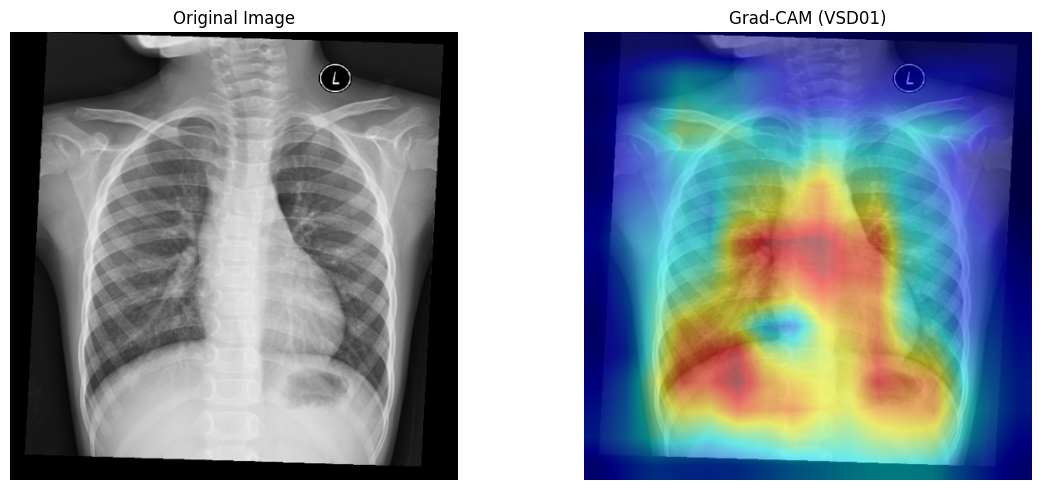

In [ ]:

# STEP 2: Import Libraries
import torch
import torchvision.transforms as transforms
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget


# STEP 4: Load the model from checkpoint
model_path = "/content/mobilenet_v2_epoch_29.pth"      # ← Replace with uploaded model filename
image_path = "/content/VSD01.jpg"    # ← Replace with uploaded image filename

# Load checkpoint
checkpoint = torch.load(model_path, map_location='cpu')

# Define MobileNetV2 architecture with 4 output classes
model = models.mobilenet_v2(weights=None)
model.classifier[1] = torch.nn.Linear(model.last_channel, 4)  # Adjust for your number of classes

# Load only the model's weights
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# STEP 5: Load and preprocess image
image = Image.open(image_path).convert("RGB")

transform = transforms.Compose([
    transforms.Resize((500, 500)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
input_tensor = transform(image).unsqueeze(0)

# STEP 6: Setup Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
input_tensor = input_tensor.to(device)

# STEP 7: Setup Grad-CAM
target_layer = model.features[-1]
cam = GradCAM(model=model, target_layers=[target_layer])

# STEP 8: Generate CAM for predicted class
grayscale_cam = cam(input_tensor=input_tensor)[0, :]  # Shape: [H, W]

# STEP 9: Overlay CAM on original image
image_np = np.array(image.resize((500, 500))).astype(np.float32) / 255.0
visualization = show_cam_on_image(image_np, grayscale_cam, use_rgb=True)

# STEP 10: Display Results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(visualization)
plt.title("Grad-CAM (VSD01)")
plt.axis("off")

plt.tight_layout()
plt.show()


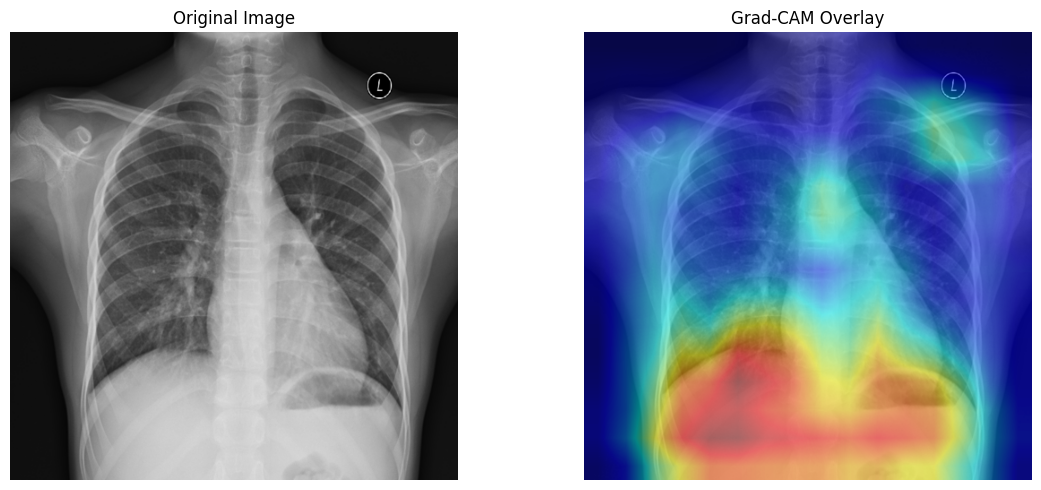

In [ ]:

# STEP 2: Import Libraries
import torch
import torchvision.transforms as transforms
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget


# STEP 4: Load the model from checkpoint
model_path = "/content/mobilenet_v2_epoch_29.pth"      # ← Replace with uploaded model filename
image_path = "/content/ASD23.jpg"    # ← Replace with uploaded image filename

# Load checkpoint
checkpoint = torch.load(model_path, map_location='cpu')

# Define MobileNetV2 architecture with 4 output classes
model = models.mobilenet_v2(weights=None)
model.classifier[1] = torch.nn.Linear(model.last_channel, 4)  # Adjust for your number of classes

# Load only the model's weights
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# STEP 5: Load and preprocess image
image = Image.open(image_path).convert("RGB")

transform = transforms.Compose([
    transforms.Resize((500, 500)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
input_tensor = transform(image).unsqueeze(0)

# STEP 6: Setup Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
input_tensor = input_tensor.to(device)

# STEP 7: Setup Grad-CAM
target_layer = model.features[-1]
cam = GradCAM(model=model, target_layers=[target_layer])

# STEP 8: Generate CAM for predicted class
grayscale_cam = cam(input_tensor=input_tensor)[0, :]  # Shape: [H, W]

# STEP 9: Overlay CAM on original image
image_np = np.array(image.resize((500, 500))).astype(np.float32) / 255.0
visualization = show_cam_on_image(image_np, grayscale_cam, use_rgb=True)

# STEP 10: Display Results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(visualization)
plt.title("Grad-CAM Overlay")
plt.axis("off")

plt.tight_layout()
plt.show()


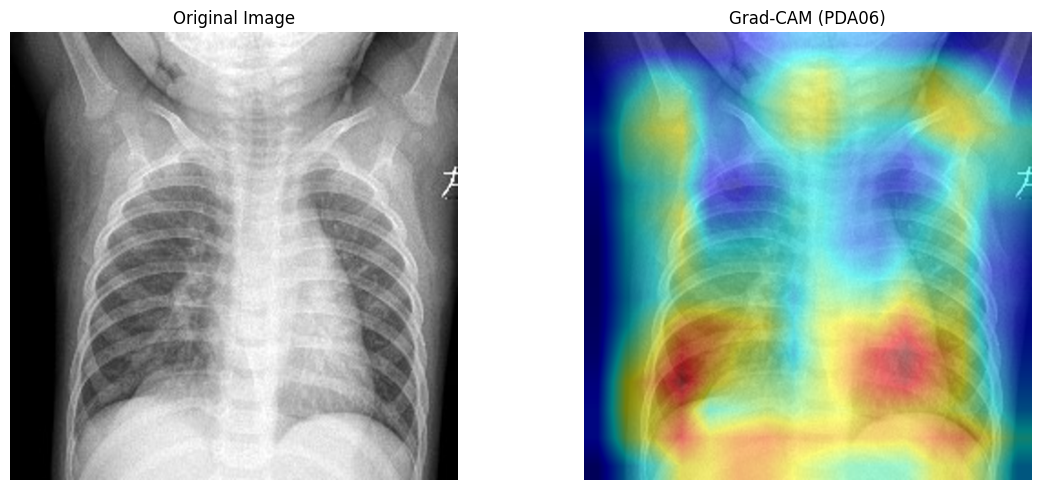

In [ ]:

# STEP 2: Import Libraries
import torch
import torchvision.transforms as transforms
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget


# STEP 4: Load the model from checkpoint
model_path = "/content/mobilenet_v2_epoch_29.pth"      # ← Replace with uploaded model filename
image_path = "/content/PDA06.jpg"    # ← Replace with uploaded image filename

# Load checkpoint
checkpoint = torch.load(model_path, map_location='cpu')

# Define MobileNetV2 architecture with 4 output classes
model = models.mobilenet_v2(weights=None)
model.classifier[1] = torch.nn.Linear(model.last_channel, 4)  # Adjust for your number of classes

# Load only the model's weights
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# STEP 5: Load and preprocess image
image = Image.open(image_path).convert("RGB")

transform = transforms.Compose([
    transforms.Resize((500, 500)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
input_tensor = transform(image).unsqueeze(0)

# STEP 6: Setup Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
input_tensor = input_tensor.to(device)

# STEP 7: Setup Grad-CAM
target_layer = model.features[-1]
cam = GradCAM(model=model, target_layers=[target_layer])

# STEP 8: Generate CAM for predicted class
grayscale_cam = cam(input_tensor=input_tensor)[0, :]  # Shape: [H, W]

# STEP 9: Overlay CAM on original image
image_np = np.array(image.resize((500, 500))).astype(np.float32) / 255.0
visualization = show_cam_on_image(image_np, grayscale_cam, use_rgb=True)

# STEP 10: Display Results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(visualization)
plt.title("Grad-CAM (PDA06)")
plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
# STEP 1: Import Libraries
import os
import torch
import torchvision.transforms as transforms
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

# STEP 2: Define paths
image_dir = "/content/drive/MyDrive/data/ASD"
model_path = "/content/mobilenet_v2_epoch_29.pth"

# STEP 3: Load the model
checkpoint = torch.load(model_path, map_location='cpu')
model = models.mobilenet_v2(weights=None)
model.classifier[1] = torch.nn.Linear(model.last_channel, 4)  # Adjust for your number of classes
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# STEP 4: Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# STEP 5: Define preprocessing
transform = transforms.Compose([
    transforms.Resize((500, 500)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# STEP 6: Setup Grad-CAM
target_layer = model.features[-1]
cam = GradCAM(model=model, target_layers=[target_layer])

# STEP 7: Traverse through all images
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for img_name in image_files:
    img_path = os.path.join(image_dir, img_name)
    image = Image.open(img_path).convert("RGB")

    # Preprocess
    input_tensor = transform(image).unsqueeze(0).to(device)

    # Generate Grad-CAM
    grayscale_cam = cam(input_tensor=input_tensor)[0, :]
    image_np = np.array(image.resize((500, 500))).astype(np.float32) / 255.0
    visualization = show_cam_on_image(image_np, grayscale_cam, use_rgb=True)

    # Display
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image_np)
    plt.title(f"Original: {img_name}")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(visualization)
    plt.title(f"Grad-CAM: {img_name}")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


ModuleNotFoundError: No module named 'pytorch_grad_cam'

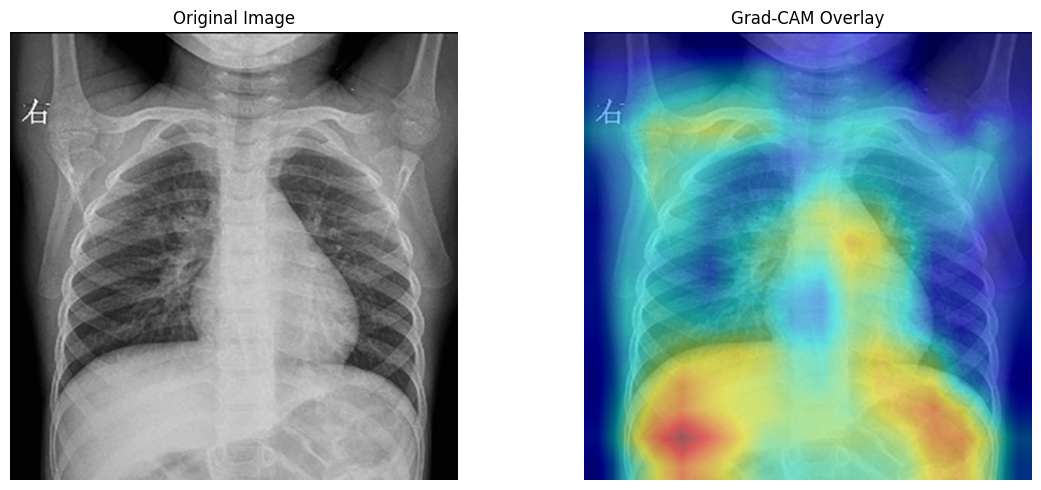